# Comparison evaluation
## MovieLens dataset

In [1]:
import utils.common
import evaluation
import importlib
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [70]:
def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

In [57]:
ml_car = pd.read_csv('../evals/Comp_ConstraintAutoRec_ML_pretrain.csv', index_col = 0)
ml_car['dataset'] = 'MovieLens'
ml_car['training_time'] = 87.0
ml_car.name = 'CAR'

ml_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comparison_ML.csv', index_col = 0)
ml_nlr['dataset'] = 'MovieLens'
ml_nlr['training_time'] = 546.0
ml_nlr.name = 'NLR'

ml_bpr = pd.read_csv('../evals/Comp_BPR_comparison_ml.csv', index_col = 0)
ml_bpr['dataset'] = 'MovieLens'
ml_bpr['training_time'] = 50.0
ml_bpr.name = 'BPR'

ml_mf = pd.read_csv('../evals/Comp_MatrixFactorizationcomparison_ml.csv', index_col = 0)
ml_mf['dataset'] = 'MovieLens'
ml_mf['training_time'] = 18.0
ml_mf.name = 'MF'

In [58]:
comparison_trained = pd.concat([ml_car.tail(1), ml_nlr.tail(1), ml_bpr.tail(1), ml_mf.tail(1)])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [59]:
comparison_trained = comparison_trained.set_index(['dataset', 'name'])

In [62]:
metrics = comparison_trained[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'training_time']].transpose()

In [63]:
print(metrics.MovieLens.to_latex(float_format = "%.3f", bold_rows=True))
metrics.MovieLens

\begin{tabular}{lrrrr}
\toprule
\textbf{name} &    CAR &     NLR &    BPR &     MF \\
\midrule
\textbf{map@1        } &  0.309 &   0.221 &  0.191 &  0.002 \\
\textbf{map@5        } &  0.183 &   0.122 &  0.109 &  0.001 \\
\textbf{map@10       } &  0.153 &   0.101 &  0.087 &  0.001 \\
\textbf{diversity@5  } &  0.118 &   0.117 &  0.123 &  0.190 \\
\textbf{diversity@10 } &  0.127 &   0.125 &  0.126 &  0.190 \\
\textbf{epc@5        } &  0.761 &   0.754 &  0.578 &  0.987 \\
\textbf{epc@10       } &  0.775 &   0.779 &  0.607 &  0.987 \\
\textbf{epd@5        } &  0.149 &   0.150 &  0.159 &  0.190 \\
\textbf{coverage@1   } &  0.059 &   0.072 &  0.008 &  0.468 \\
\textbf{coverage@5   } &  0.113 &   0.152 &  0.021 &  0.749 \\
\textbf{coverage@10  } &  0.153 &   0.195 &  0.032 &  0.850 \\
\textbf{training\_time} & 87.000 & 546.000 & 50.000 & 18.000 \\
\bottomrule
\end{tabular}



name,CAR,NLR,BPR,MF
map@1,0.308767,0.220950,0.191288,0.002451
map@5,0.182997,0.122442,0.109288,0.000971
map@10,0.153121,0.100815,0.087370,0.000696
diversity@5,0.118393,0.116702,0.123089,0.190216
diversity@10,0.127154,0.125416,0.126104,0.190284
epc@5,0.760686,0.753959,0.577950,0.987188
epc@10,0.775327,0.778599,0.607322,0.987129
epd@5,0.149411,0.149893,0.159331,0.189590
coverage@1,0.058569,0.072440,0.007899,0.467874
coverage@5,0.112802,0.152394,0.020615,0.748868


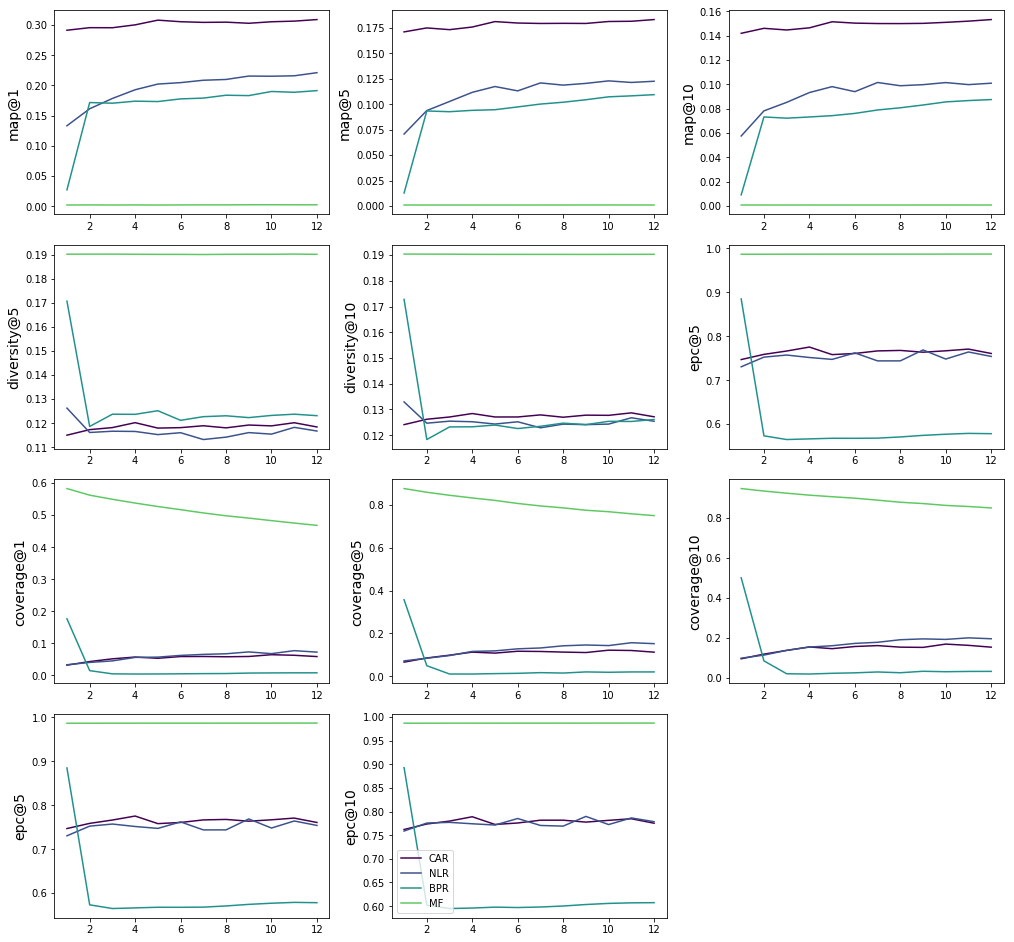

In [85]:
def plot_models(ax, models, prop):
    i = 0
    col = get_colors(range(len(models)))
    for m in models:
        ax.plot(m.index + 1, m[prop], color=col[i])   
        i = i + 1

data = [ml_car, ml_nlr, ml_bpr, ml_mf]
fig = plt.figure(figsize=(14,13))
i = 1
for prop in ['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'coverage@1', 'coverage@5', 'coverage@10', 'epc@5', 'epc@10']:
    ax1 = fig.add_subplot(4,3,i)
    ax1.set_ylabel(prop,  fontsize=14)
    plot_models(ax1, data, prop)
    i = i + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.legend(['CAR', 'NLR', 'BPR', 'MF'], fontsize=10)